In [4]:
#Packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import ipympl
from mpl_toolkits.mplot3d import Axes3D
import squarify
import category_encoders as ce
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

In [5]:
# Load cleaned datasource
ds = pd.read_excel('Cleaned_DS.xlsx')
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78409 entries, 0 to 78408
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   localID            78409 non-null  object        
 1   extractionDate     78409 non-null  datetime64[ns]
 2   Name               78409 non-null  object        
 3   Country            78409 non-null  object        
 4   globalRating       78409 non-null  float64       
 5   positionOnRanking  78409 non-null  int64         
 6   sitesOnRanking     78409 non-null  int64         
 7   totalReviews       78409 non-null  int64         
 8   userName           78409 non-null  object        
 9   userLocation       78409 non-null  object        
 10  userContributions  78409 non-null  int64         
 11  tripType           78409 non-null  object        
 12  reviewWritten      78409 non-null  datetime64[ns]
 13  reviewVisited      78409 non-null  datetime64[ns]
 14  review

# Analyzing the distribution of reviews, ratings, visitors and visited country

In [6]:
overview_rating_distribution = ds['reviewRating'].value_counts(normalize=True).sort_index()
overview_rating_distribution

reviewRating
1    0.014922
2    0.017205
3    0.056639
4    0.203433
5    0.707801
Name: proportion, dtype: float64

In [ ]:
# Calculate the rating distribution for the overview
overview_rating_distribution = ds['reviewRating'].value_counts(normalize=True) * 100

# Create a bar chart for the rating distribution with percentages
plt.figure(figsize=(10, 6))
bars = plt.bar(overview_rating_distribution.index, overview_rating_distribution.values, color='skyblue')

# Annotate the bars with the percentage values
for bar, percentage in zip(bars, overview_rating_distribution.values):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{round(percentage, 2)}%', va='bottom', ha='center')

plt.xlabel('Ratings (Stars)')
plt.ylabel('Proportion')
plt.title('Distribution of Review Ratings with Percentages')
plt.xticks(rotation=0)
plt.show()

The ratings are heavily skewed towards higher ratings 71% of reviews having a 5-star rating 20% of reviews having a 4-star ratings and lower ratings (1-3 stars) collectively make up less than 10% of the reviews.

In [7]:
overview_trip_type_distribution = ds['tripType'].value_counts(normalize=True)

In [8]:
overview_trip_type_distribution

tripType
Couples     0.510031
Family      0.212692
Friends     0.184035
Solo        0.080016
Business    0.013226
Name: proportion, dtype: float64

The most common trip types among reviewers are "Couples" (approximately 51%), followed by "Family" and "Friends". Next we wanted to compare the trip type overview with Portugal.

In [ ]:
# Count the number of visits per trip type for Portugal
portugal_visits = ds[ds['Country'] == 'Portugal']
portugal_triptype_counts = portugal_visits['tripType'].value_counts(normalize=True) * 100

# Calculate the overview trip type distribution
overview_triptype_counts = ds['tripType'].value_counts(normalize=True) * 100

# Get the trip types as the index for the x-axis
trip_types = portugal_triptype_counts.index

# Creating the grouped bar plot for both Portugal and the overview trip type distribution
plt.figure(figsize=(12, 6))

bar_width = 0.35
index = np.arange(len(trip_types))

# Plot the bars for Portugal trip types
plt.bar(index - bar_width/2, portugal_triptype_counts.values, bar_width, label='Portugal')
for i, val in enumerate(portugal_triptype_counts.values):
    plt.text(index[i] - bar_width/2, val + 1, f'{round(val, 2)}%', va='bottom', ha='center')

# Plot the bars for the overview trip type distribution
plt.bar(index + bar_width/2, overview_triptype_counts[trip_types].values, bar_width, label='Overview')
for i, val in enumerate(overview_triptype_counts[trip_types].values):
    plt.text(index[i] + bar_width/2, val + 1, f'{round(val, 2)}%', va='bottom', ha='center')

plt.title('Comparison of Trip Type Distribution for Portugal vs. Overview')
plt.xlabel('Trip Type')
plt.ylabel('Percentage of Visits (%)')
plt.xticks(index, trip_types)
plt.legend()

plt.tight_layout()
plt.show()

In [9]:
visitor_origins_distribution = ds['userLocation'].value_counts(normalize=True).head(10)
visitor_origins_distribution

userLocation
United Kingdom    0.381602
United States     0.252675
Australia         0.054573
Canada            0.042584
Ireland           0.014871
Spain             0.014807
India             0.013315
Unrecognized      0.013060
Netherlands       0.011453
Germany           0.010420
Name: proportion, dtype: float64

In [ ]:
# Count the number of reviews per user location (tourist's origin) and get the top 10
visitor_origins_distribution = ds['userLocation'].value_counts().head(10)

# Extracting the user locations and their respective review counts
top_locations_names = visitor_origins_distribution.index
top_locations_counts = visitor_origins_distribution.values

# Calculate the total number of reviews
total_reviews = ds.shape[0]

# Calculate the percentages for each location
percentages = (top_locations_counts / total_reviews) * 100

# Create a bar chart for the top 10 user locations (origins of tourists) with percentages
plt.figure(figsize=(12, 6))
bars = plt.bar(top_locations_names, top_locations_counts, color='skyblue')

# Annotate the percentages on top of the columns
for bar, percentage in zip(bars, percentages):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{round(percentage, 2)}%', va='bottom', ha='center')

plt.title('Top 10 Origins of Tourists')
plt.xlabel('User Location')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45, ha="right")  # Rotate the x labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

The top visitor origins are from the United Kingdom (approximately 38%), the United States (around 25%), and 
other countries like Australia, Canada, and Ireland. This shows that the data might be biased since the 
most common users of TripAdvisor are from United States and United Kingdom 
(https://6sense.com/tech/reservation-and-online-booking/tripadvisor-market-share)

In [10]:
most_visited_countries = ds['Country'].value_counts(normalize=True).sort_values(ascending=False)
most_visited_countries

Country
Spain             0.245112
England           0.200653
Scotland          0.075272
Italy             0.074520
Portugal          0.063462
Poland            0.049331
France            0.043286
Austria           0.041653
Russia            0.038299
Greece            0.033976
Croatia           0.028045
Belgium           0.022255
Hungary           0.018136
Germany           0.012894
Estonia           0.010254
Turkey            0.006887
Cyprus            0.006555
Czech Republic    0.005216
Montenegro        0.005050
Finland           0.004783
Lithuania         0.004094
Norway            0.003482
Bulgaria          0.003418
Latvia            0.003367
Name: proportion, dtype: float64

In [ ]:
# Count the number of reviews per country and get the top 7
most_visited_countries = ds['Country'].value_counts().head(7)

# Extracting the country names and their respective review counts
top_countries_names = most_visited_countries.index
top_countries_counts = most_visited_countries.values

# Calculate the total number of reviews
total_reviews = ds.shape[0]

# Calculate the percentages for each country
percentages = (top_countries_counts / total_reviews) * 100

# Create a bar chart for the top 7 most reviewed countries with percentages
plt.figure(figsize=(12, 6))
bars = plt.bar(top_countries_names, top_countries_counts, color='skyblue')

# Annotate the percentages on top of the columns
for bar, percentage in zip(bars, percentages):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{round(percentage, 2)}%', va='bottom', ha='center')

plt.title('Top 7 Most Visited Countries')
plt.xlabel('Country')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45, ha="right")  # Rotate the x labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

The top 7 are Spain, England, Scotland, Italy, Portugal, Poland and France. Spain holds the largest share with 25% of attractions, indicating its prominence as a tourist destination. England follows with 20%, reflecting its rich historical heritage.

## Create new Variables: Attraction Type

 Examing the Attraction 'Name' field we are looking into patterns that might indicate the type of attraction.

In [11]:
# Categorization function based on keywords
def categorize_attraction(name):
    # Defining keywords for different categories of attractions
    categories = {
        'Church/Religious Site': ['Basilica', 'Mezquita', 'Catedral', 'Cathedral', 'Church', 'Abbaye', 'Abbey', 'Cathedrale', 'Vatican City', 'Bom Jesus do Monte', 'Mosteiro'],
        'Historical Building/Site': ['Staromestske namesti', 'The Alhambra', 'Real Alcazar de Sevilla', 'Grand Place', 'Castle', 'Palace', 'Park and National Palace of Pena', 'Torre', 'Tower', 'Fort', 'Historic', 'Old Town', 'Square', 'Palazzo', 'Centro', 'Historic Center', 'Sassi di Matera', 'Ortigia', 'Quinta da Regaleira', 'Palais', 'The State Museum St. Isaac’s Cathedral', 'La Petite France', 'Old Nessebar', 'Historic Fortified City of Carcassonne'],
        'Cultural Site': ['Casa Batlo', 'Casa Milà - La Pedrera', 'Museum', 'Wieliczka Salt Mine', 'Gallery', 'Theatre', 'House', 'Library', 'Opera', 'Muzeum'],
        'Nature/Recreational Area': ['Parc', 'Park', 'Gardens', 'Ponte de Dom Luís I', 'Beach', 'Island', 'Mountain', 'River', 'Canal Grande', 'Royal Albert Dock Liverpool', 'Cais da Ribeira'],
        'Archaeological Site': ['Acropolis', 'The Roman Baths', 'Ruins', 'Archaeological', 'Ancient', 'Arena di Verona', 'Valle dei Templi', 'Stonehenge'],
    }
   # Loop through each category and check if the name contains any of the keywords
    for category, keywords in categories.items():
        if any(word in name for word in keywords):
            return category
    # If no keyword matches, return 'Other'
    return 'Other'

In [12]:
# Apply the categorization function to the 'Name' column
ds['AttractionType'] = ds['Name'].apply(categorize_attraction)

In [13]:
ds['AttractionType'].value_counts()

AttractionType
Historical Building/Site    33221
Church/Religious Site       17277
Nature/Recreational Area    11537
Archaeological Site          7139
Other                        5607
Cultural Site                3628
Name: count, dtype: int64

In [ ]:
ds['AttractionType'].value_counts(normalize=True).sort_values(ascending=False)

In [ ]:
attraction_type_distribution = ds['AttractionType'].value_counts()

In [ ]:
# Calculate the percentages
total_count = len(ds)
percentages = (attraction_type_distribution / total_count) * 100

# Create a bar chart for the distribution of AttractionTypes with percentages
plt.figure(figsize=(10, 6))
bars = plt.bar(attraction_type_distribution.index, attraction_type_distribution.values, color='skyblue')

# Annotate the bars with the percentage values
for bar, percentage in zip(bars, percentages):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{round(percentage, 2)}%', va='bottom', ha='center')

plt.title('Distribution of Attraction Types with Percentages')
plt.xlabel('Attraction Type')
plt.ylabel('Count')

# Set x-axis labels to be horizontal (0-degree rotation)
plt.xticks(rotation=25)

plt.tight_layout()
plt.show()

Historical Building/Site are in the top of the list, indicating that historical buildings and sites are the most common type of attraction. This suggests a strong interest in history and heritage among tourists.

## Create new Variables: Covid
Covid: object - considering that the pandemic start date was 2020-03-11, it looks if the place was visited Before of After. We will consider the beginning of the Pandemic when the World Health Organization (WHO) declared it on March 11, 2020

In [16]:
pandemic_start_date = pd.to_datetime('2020-03-11')

In [17]:
ds['Covid'] = ds['reviewVisited'].apply(lambda x: 'Before' if x < pandemic_start_date else 'After')

In [19]:
# Converting reviewWritten to datetime
ds['reviewWritten'] = pd.to_datetime(ds['reviewWritten'])

In [20]:
ds['Covid'].value_counts()

Covid
Before    73364
After      5045
Name: count, dtype: int64

There's a significant decrease in the number of reviews post-pandemic, which is expected given travel restrictions and global uncertainty during that period.

In [21]:
# Analyzing rating distributions for pre-pandemic and post-pandemic
rating_distribution = ds.groupby('Covid')['reviewRating'].value_counts(normalize=True).unstack().fillna(0)
rating_distribution

reviewRating,1,2,3,4,5
Covid,,,,,
After,0.040833,0.036472,0.068385,0.198811,0.655500
Before,0.013140,0.015880,0.055831,0.203751,0.711398


Since the pandemic, there's been a big increase in the lowest ratings, especially in 1-star, and a decrease in 5-star ratings. This could be due to various factors such as possibly reduced service quality or visitor experience due to health and safety measures, or other pandemic-related impacts. Despite these changes, the majority of reviews remain highly positive (5 stars).

In [22]:
# Counting the number of visits before and after COVID
before_covid_count = ds['Covid'].value_counts().get('Before', 0)
after_covid_count = ds['Covid'].value_counts().get('After', 0)

In [1]:
# Calculate percentages
total_visits = len(ds)
before_covid_percentage = (before_covid_count / total_visits) * 100
after_covid_percentage = (after_covid_count / total_visits) * 100

# Data to plot
labels = ['Before COVID', 'After COVID']
counts = [before_covid_count, after_covid_count]
percentages = [before_covid_percentage, after_covid_percentage]

# Plotting
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, counts, color=['blue', 'orange'])

# Annotate the bars with the percentage values
for bar, percentage in zip(bars, percentages):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{round(percentage, 2)}%', va='bottom', ha='center')

plt.title('Total Visits Before and After COVID')
plt.ylabel('Number of Visits')
plt.show()

NameError: name 'ds' is not defined

## Create new Variables: Tourism Type
Tourism Type: object - it looks if the Country's Attraction is the same as the userLocation, if yes then is Local if not is Abroad

In [24]:
def determine_tourism_type(user_loc, destination_loc):
    if user_loc == destination_loc:
        return 'Local'
    else:
        return 'Abroad'

# Assuming 'userCountry' and 'destinationCountry' are your standardized country columns
ds['tourismType'] = ds.apply(lambda x: determine_tourism_type(x['userLocation'], x['Country']), axis=1)

In [26]:
ds.groupby('Covid')['tourismType'].value_counts(normalize=True).unstack().fillna(0)

tourismType,Abroad,Local
Covid,,
After,0.948266,0.051734
Before,0.979649,0.020351


There was a slightly increase in Local tourism after COVID which was expected due to the travel restrictions

In [27]:
rating_distribution_touristType = ds.groupby('tourismType')['reviewRating'].value_counts(normalize=True).unstack().fillna(0)
rating_distribution_touristType

reviewRating,1,2,3,4,5
tourismType,,,,,
Abroad,0.014859,0.017324,0.056800,0.204749,0.706268
Local,0.017674,0.011973,0.049601,0.145952,0.774800


## Create new Variables: Seasonality of Travel
Season: objtect - we'll categorize each trip based on the season in which it occurs. 

In [43]:
# Assuming our data is already loaded into our DataFrame and as the correct format.
ds['reviewVisited'] = pd.to_datetime(ds['reviewVisited'])

In [44]:
# Define the Function to Determine Seasons
def get_season(month):
    if month in [12, 1, 2]:  # December, January, February
        return 'Winter'
    elif month in [3, 4, 5]:  # March, April, May
        return 'Spring'
    elif month in [6, 7, 8]:  # June, July, August
        return 'Summer'
    else:  # September, October, November
        return 'Autumn'

In [45]:
# Apply the function to each row in the DataFrame
ds['Season'] = ds['reviewVisited'].dt.month.apply(get_season)

In [ ]:
# Calculate the season distribution for the overview
overview_season_type_distribution = ds['Season'].value_counts(normalize=True) * 100

# Sort the seasons order for consistent visualization
ordered_seasons = ['Winter', 'Spring', 'Summer', 'Autumn']
overview_season_type_distribution = overview_season_type_distribution.reindex(ordered_seasons)

# Calculate the season distribution for Portugal
portugal_visits = ds[ds['Country'] == 'Portugal']
portugal_season_counts = portugal_visits['Season'].value_counts(normalize=True) * 100
portugal_season_counts = portugal_season_counts.reindex(ordered_seasons)

# Create a side-by-side grouped bar chart for comparison
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = range(len(overview_season_type_distribution))

bars1 = plt.bar(index, overview_season_type_distribution.values, bar_width, label='Overview', color='lightskyblue')
bars2 = plt.bar([i + bar_width for i in index], portugal_season_counts.values, bar_width, label='Portugal', color='firebrick')

# Annotate the bars with the percentage values
for bar in bars1 + bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{round(yval, 2)}%', va='bottom', ha='center')

plt.title('Season Distribution: Overview vs Portugal')
plt.xlabel('Season')
plt.ylabel('Percentage of Visits (%)')
plt.xticks([i + bar_width / 2 for i in index], ordered_seasons)
plt.legend()
plt.tight_layout()
plt.show()

## Create new Variables from Holidays dataset

In [47]:
ds['reviewVisited'] = pd.to_datetime(ds['reviewVisited'])

In [48]:
# Extract day and month
ds['Day'] = ds['reviewVisited'].dt.day
ds['Month'] = ds['reviewVisited'].dt.month

In [49]:
# Create a new column with combined day and month
ds['DayMonth'] = ds['reviewVisited'].dt.strftime('%m-%d')

In [50]:
# Read the Cleaned_Holidays file into Pandas DataFrames
ds_holidays = pd.read_excel('Cleaned_Holidays.xlsx')

In [51]:
ds_holidays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1667 entries, 0 to 1666
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       1667 non-null   int64 
 1   countryOrRegion  1667 non-null   object
 2   holidayName      1667 non-null   object
 3   date             1667 non-null   object
dtypes: int64(1), object(3)
memory usage: 52.2+ KB


In [52]:
ds_holidays

,Unnamed: 0,countryOrRegion,holidayName,date
0,25392,Argentina,Año Nuevo [New Year's Day],2019-01-01
1,25393,Australia,New Year's Day,2019-01-01
2,25394,Austria,Neujahr,2019-01-01
3,25395,Belarus,Новый год,2019-01-01
4,25396,Belgium,Nieuwjaarsdag,2019-01-01
...,...,...,...,...
1662,27054,Wales,Boxing Day (Observed),2021-12-28
1663,27055,Canada,New Year's Day (Observed),2021-12-31
1664,27056,Mexico,Año Nuevo [New Year's Day] (Observed),2021-12-31
1665,27057,Sweden,Nyårsafton,2021-12-31


In [53]:
ds_holidays['date'] = pd.to_datetime(ds_holidays['date'])

In [54]:
# Check for matching dates with the 'Holidays' dataset
ds['Is_Holiday'] = ds['DayMonth'].isin(ds_holidays['date'].dt.strftime('%m-%d'))

In [55]:
# Creating a new column for the date of the holiday
ds['Holiday_Date'] = ds['reviewVisited'].where(ds['Is_Holiday']).dt.date

In [56]:
# Extract day and month
ds_holidays['Day'] = ds_holidays['date'].dt.day
ds_holidays['Month'] = ds_holidays['date'].dt.month

In [57]:
# Create a new column with combined day and month
ds_holidays['DayMonth'] = ds_holidays['date'].dt.strftime('%m-%d')

In [58]:
# Merge 'ds' with 'holidays_df' based on the 'DayMonth' column
merged_ds = pd.merge(ds, ds_holidays[['DayMonth', 'holidayName']], on='DayMonth', how='left')

In [59]:
# Rename the 'holidayName' column to 'Holiday_Name'
merged_ds.rename(columns={'holidayName': 'Holiday_Name'}, inplace=True)

In [60]:
# Display the DataFrame with the new 'Holiday_Name' column
print(merged_ds[['DayMonth', 'Is_Holiday', 'Holiday_Name']].head())

  DayMonth  Is_Holiday      Holiday_Name
0    08-01        True  Nationalfeiertag
1    08-01        True  Nationalfeiertag
2    08-01        True            Søndag
3    08-01        True            Söndag
4    08-01        True  Nationalfeiertag


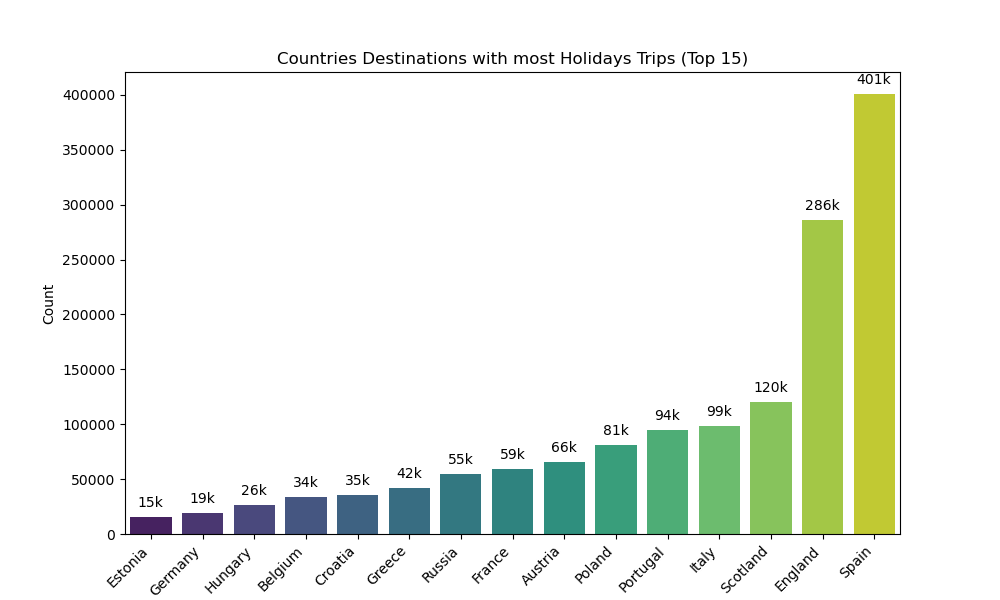

In [61]:
# Creating a bar plot for top 15 countries travelling during holidays
# Filter rows where 'is_holiday' is true
holidays_trips = merged_ds[merged_ds['Is_Holiday'] == True]

# Get the top 15 countries with the highest count of holiday trips
top_countries = holidays_trips['Country'].value_counts().nlargest(15).index

# Filter the DataFrame for only the top 15 countries
top_countries_df = holidays_trips[holidays_trips['Country'].isin(top_countries)]

# Create a bar plot for the count of holidays per country (Top 15)
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Country', data=top_countries_df, order=top_countries_df['Country'].value_counts().index[::-1], palette='viridis')
for p in ax.patches:
    count_value = p.get_height()
    formatted_value = '{:,.0f}k'.format(count_value / 1000)  # Format as thousands with no decimals
    ax.annotate(formatted_value, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Countries Destinations with most Holidays Trips (Top 15)')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

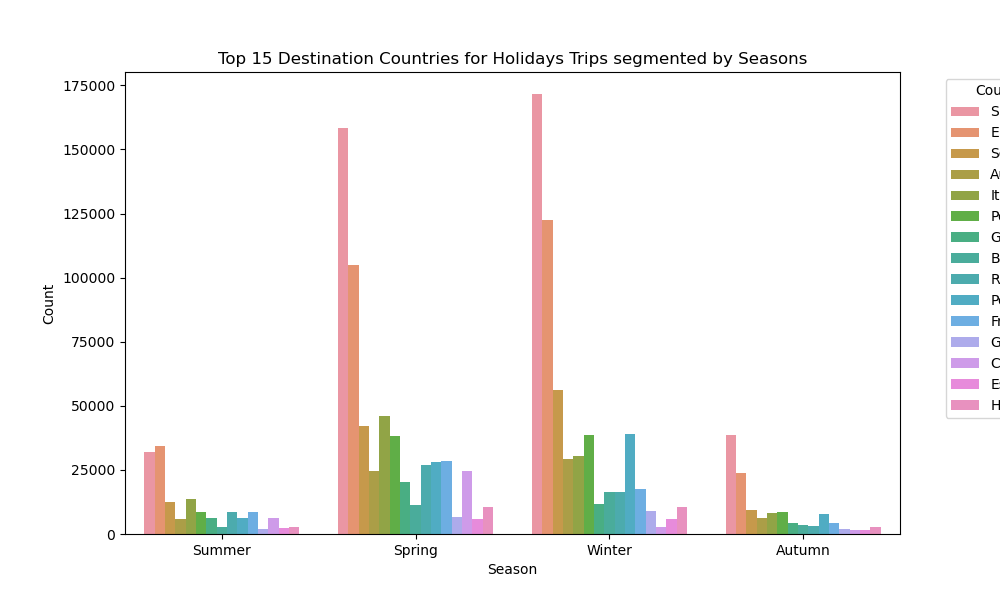

In [62]:
# Filter rows where 'is_holiday' is true
holidays_trips = merged_ds[merged_ds['Is_Holiday'] == True]

# Get the top 15 countries with the highest count of holiday trips
top_countries = holidays_trips['Country'].value_counts().nlargest(15).index

# Filter
top_countries_df = holidays_trips[holidays_trips['Country'].isin(top_countries)]

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Season', hue='Country', data=top_countries_df)
plt.title('Top 15 Destination Countries for Holidays Trips segmented by Seasons')
plt.xlabel('Season')
plt.ylabel('Count')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.show()

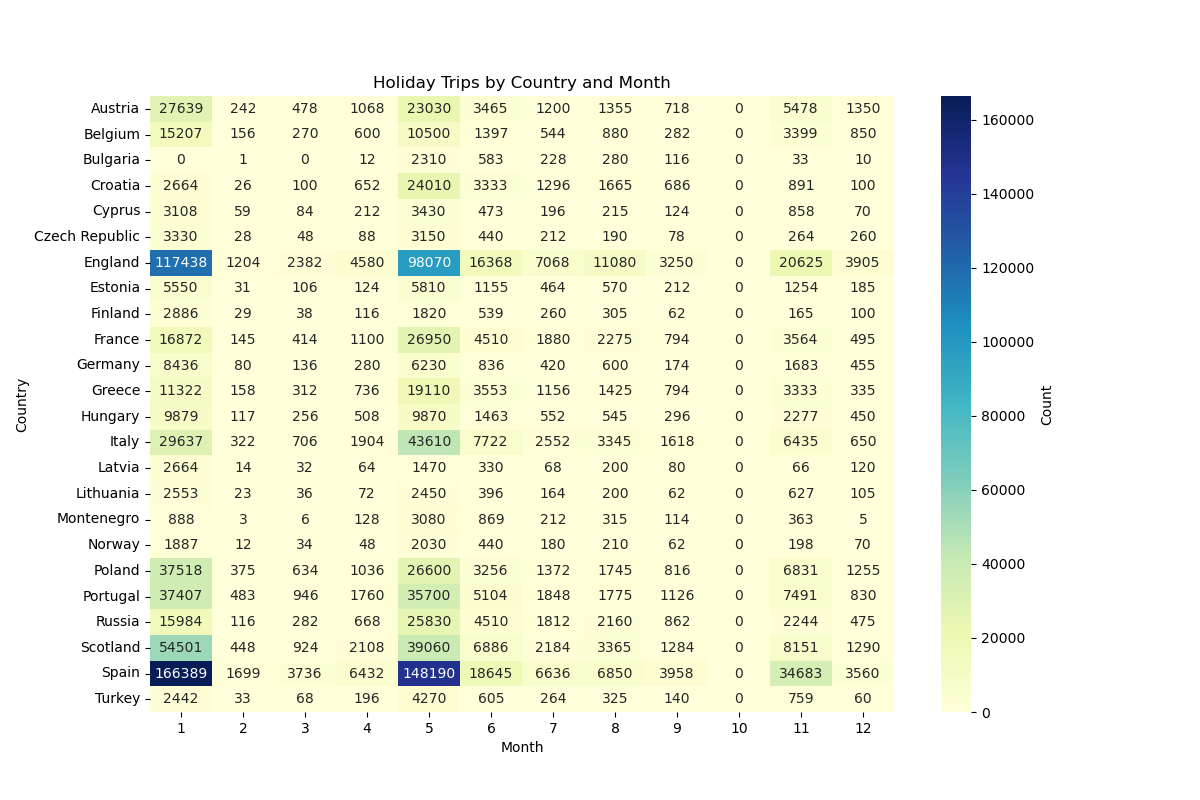

In [63]:
# Create a pivot table to get the count of holiday trips by country and month
heatmap_data = merged_ds.pivot_table(index='Country', columns='Month', values='Is_Holiday', aggfunc='sum', fill_value=0)

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d', cbar_kws={'label': 'Count'})
plt.title('Holiday Trips by Country and Month')
plt.xlabel('Month')
plt.ylabel('Country')
plt.show()

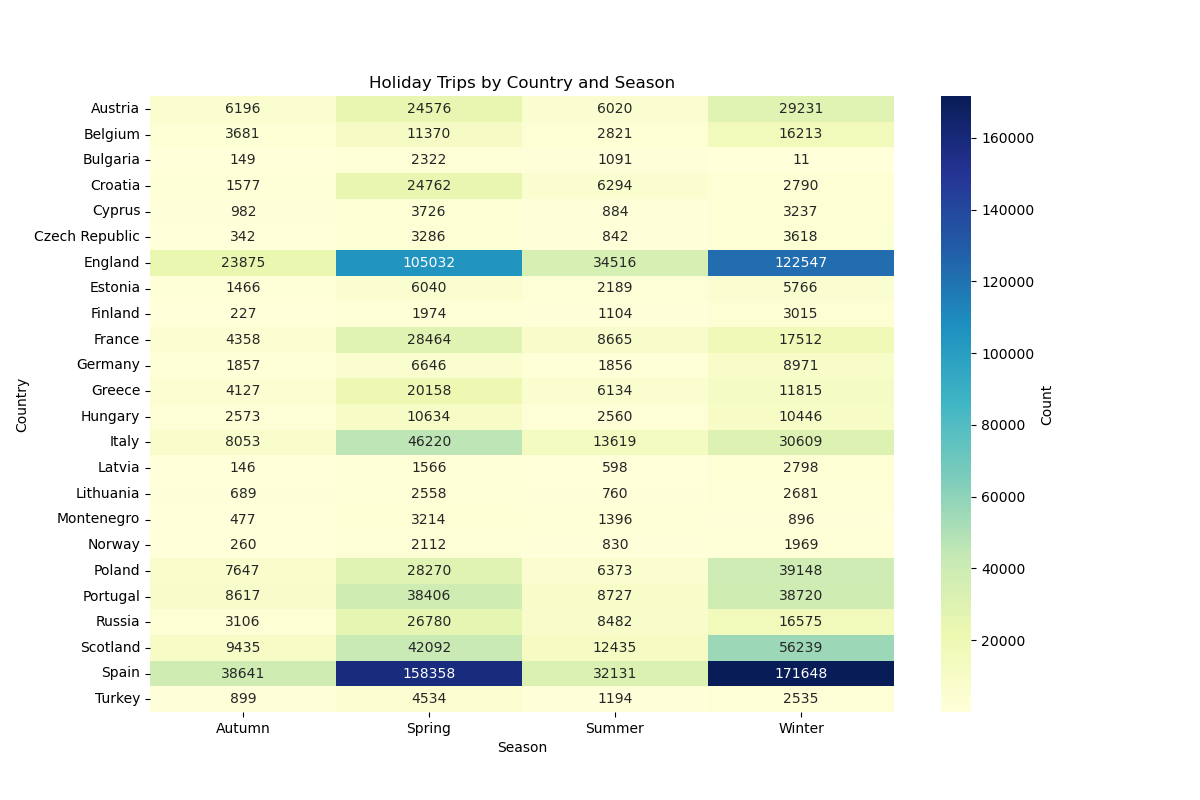

In [64]:
# Create a pivot table to get the count of holiday trips by country and month
heatmap_data = merged_ds.pivot_table(index='Country', columns='Season', values='Is_Holiday', aggfunc='sum', fill_value=0)

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d', cbar_kws={'label': 'Count'})
plt.title('Holiday Trips by Country and Season')
plt.xlabel('Season')
plt.ylabel('Country')
plt.show()

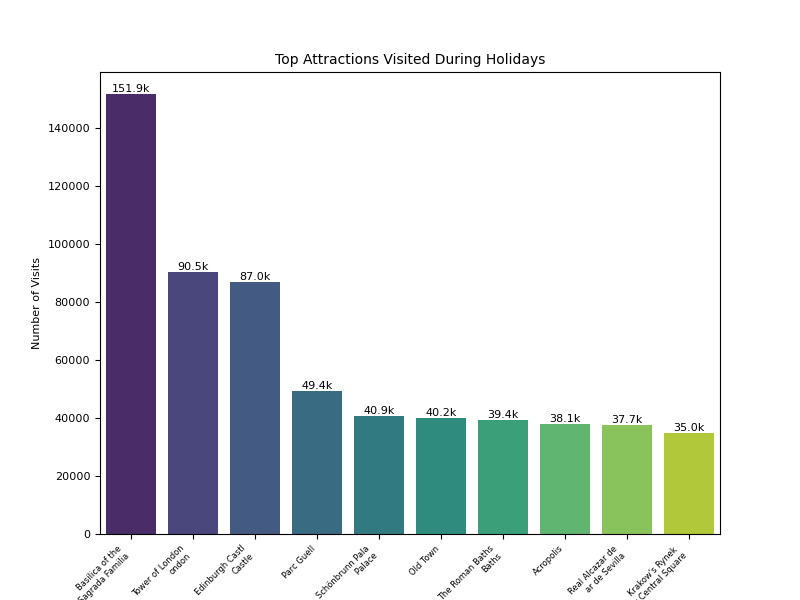

In [65]:
# What main attractions do holiday travellers visit the most?

# Filter rows where 'is_holiday' is true
holiday_trips = merged_ds[merged_ds['Is_Holiday'] == True]

# Get the top N attractions visited during holiday trips
top_attractions = holiday_trips['Name'].value_counts().nlargest(10)

# Create a bar plot for the top attractions (vertical bars)
plt.figure(figsize=(8, 6))
barplot = sns.barplot(x=top_attractions.index, y=top_attractions.values, palette='viridis')
barplot.set_ylabel('Number of Visits', fontsize=8)
barplot.set_xlabel('Name', fontsize=5)
barplot.set_title('Top Attractions Visited During Holidays', fontsize=10)

# Adjust tick label font size
plt.xticks(rotation=45, ha='right', fontsize=6)
plt.yticks(fontsize=8)

# Display values labels on top of the bars
for index, value in enumerate(top_attractions.values):
    plt.text(index, value, f'{value / 1000:.1f}k', fontsize=8, ha='center', va='bottom')

# Split the attraction names into two lines
new_labels = [label[:15] + '\n' + label[10:] if len(label) > 10 else label for label in top_attractions.index]
barplot.set_xticklabels(new_labels)
plt.show()

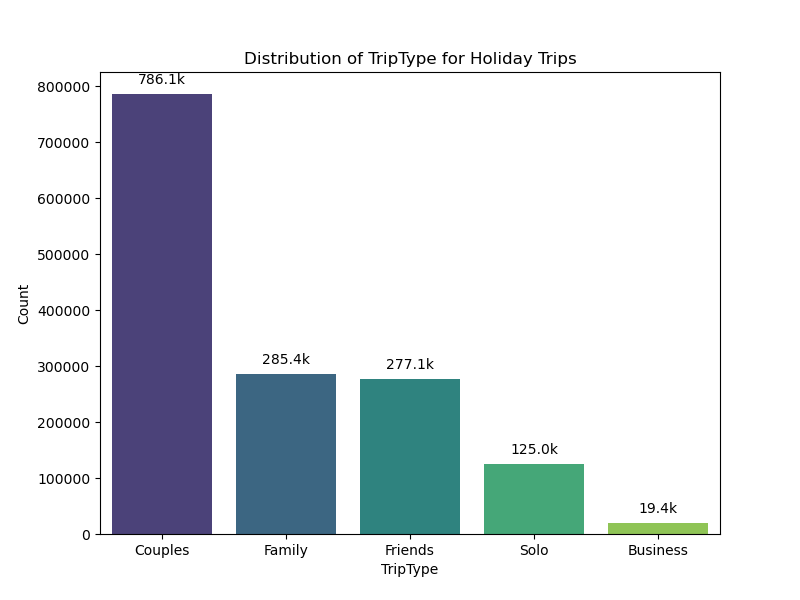

In [66]:
# What about triType for Holiday travellers?
holiday_trips = merged_ds[merged_ds['Is_Holiday'] == True]

# Create a count plot for 'TripType' with holidays
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='tripType', data=holiday_trips, palette='viridis', order=holiday_trips['tripType'].value_counts().index)
plt.title('Distribution of TripType for Holiday Trips')
plt.xlabel('TripType')
plt.ylabel('Count')

# Display value labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height() / 1000:.1f}k', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.show()

In [67]:
# Count of Is_Holidays (True and False)
is_holiday_counts = merged_ds['Is_Holiday'].value_counts()

# Most common Holiday_Date
most_common_holiday_date = merged_ds['Holiday_Date'].mode().iloc[0]

print(f"Count of Is_Holiday = True: {is_holiday_counts[True]}")
print(f"Count of Is_Holiday = False: {is_holiday_counts[False]}")
print(f"Most common Holiday_Date: {most_common_holiday_date}")

Count of Is_Holiday = True: 1492991
Count of Is_Holiday = False: 7083
Most common Holiday_Date: 2019-05-01


In [68]:
# Calculating the percentage of Is_Holiday being True in the overall dataset
holiday_percentage = (merged_ds['Is_Holiday'].sum() / len(merged_ds)) * 100

print(f"Percentage of Is_Holiday = True in overall dataset: {holiday_percentage:.2f}%")

Percentage of Is_Holiday = True in overall dataset: 99.53%


In [69]:
# Filter the dataset for the most common Holiday_Date
common_date_df = merged_ds[merged_ds['Holiday_Date'] == most_common_holiday_date]

# Retrieve all Holiday_Names for the most common Holiday_Date
common_date_holiday_names = common_date_df['Holiday_Name'].unique()

print(f"Most common Holiday_Date: {most_common_holiday_date}")
print(f"Holiday_Names for the most common Holiday_Date: {common_date_holiday_names}")

Most common Holiday_Date: 2019-05-01
Holiday_Names for the most common Holiday_Date: ['Día del Trabajo [Labour Day]' 'Staatsfeiertag' 'Праздник труда'
 'Dag van de Arbeid' 'Dia Mundial do Trabalho' 'Međunarodni praznik rada'
 'Svátek práce' 'Vappu' 'Fête du Travail' 'Erster Mai' 'A Munka ünnepe'
 'Labour Day' 'Festa dei Lavoratori' '天皇の即位の日' 'Arbeidernes dag'
 'Święto Państwowe' 'Dia do Trabalhador' 'praznik dela' "Workers' Day"
 'Día del Trabajador' 'Första maj' 'День праці']


The holiday on which people travelled the most was Labour Day (01/05)

In [70]:
# Most common Holiday_Date
most_common_holiday_date = merged_ds['Holiday_Date'].mode().iloc[0]
 
# Filter the dataset for the most common Holiday_Date and visits to Portugal
visits_to_portugal_common_date = merged_ds[(merged_ds['Holiday_Date'] == most_common_holiday_date) & (merged_ds['Country'] == 'Portugal')]
 
# Get the total count of visitors to Portugal on the most common Holiday_Date
total_visitors_to_portugal_common_date = len(visits_to_portugal_common_date)
 
# Display the result
print(f"Most common Holiday_Date: {most_common_holiday_date}")
print(f"Total visitors to Portugal on the most common Holiday_Date: {total_visitors_to_portugal_common_date}")

Most common Holiday_Date: 2019-05-01
Total visitors to Portugal on the most common Holiday_Date: 35070


In [71]:
ds

,localID,extractionDate,Name,Country,globalRating,positionOnRanking,sitesOnRanking,totalReviews,userName,userLocation,...,AttractionType,Covid,tourismType,YearMonth,Season,Day,Month,DayMonth,Is_Holiday,Holiday_Date
0,MAG001,2021-08-20 08:24:40.077,Basilica of the Sagrada Familia,Spain,4.5,1,1186,163828,Maurice M@MauriceM171,United States,...,Church/Religious Site,After,Abroad,2021-08,Summer,1,8,08-01,True,2021-08-01
1,MAG001,2021-08-20 08:24:40.097,Basilica of the Sagrada Familia,Spain,4.5,1,1186,163828,nickchamb@nickchamb,Ireland,...,Church/Religious Site,After,Abroad,2021-03,Spring,1,3,03-01,True,2021-03-01
2,MAG001,2021-08-20 08:24:40.117,Basilica of the Sagrada Familia,Spain,4.5,1,1186,163828,Arthur Villon@arthur4588,Spain,...,Church/Religious Site,After,Local,2021-08,Summer,1,8,08-01,True,2021-08-01
3,MAG001,2021-08-20 08:24:40.147,Basilica of the Sagrada Familia,Spain,4.5,1,1186,163828,James U@696jamesu,Thailand,...,Church/Religious Site,After,Abroad,2021-07,Summer,1,7,07-01,True,2021-07-01
4,MAG001,2021-08-20 08:24:40.159,Basilica of the Sagrada Familia,Spain,4.5,1,1186,163828,Kamal K Sirra@Sirra63,Spain,...,Church/Religious Site,After,Local,2021-07,Summer,1,7,07-01,True,2021-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78404,MAG100,2021-08-21 16:27:11.518,Centro Storico,Italy,4.5,11,677,5179,Diego B@diegobX5676JH,Argentina,...,Historical Building/Site,Before,Abroad,2019-04,Spring,1,4,04-01,True,2019-04-01
78405,MAG100,2021-08-21 16:27:11.614,Centro Storico,Italy,4.5,11,677,5179,rosa.ji@rosaji,United Kingdom,...,Historical Building/Site,Before,Abroad,2019-03,Spring,1,3,03-01,True,2019-03-01
78406,MAG100,2021-08-21 16:27:11.705,Centro Storico,Italy,4.5,11,677,5179,Margrieta K@Margrieta2013,Netherlands,...,Historical Building/Site,Before,Abroad,2019-03,Spring,1,3,03-01,True,2019-03-01
78407,MAG100,2021-08-21 16:27:11.795,Centro Storico,Italy,4.5,11,677,5179,David M@DTM56,United Kingdom,...,Historical Building/Site,Before,Abroad,2019-02,Winter,1,2,02-01,True,2019-02-01


35070 travellers visited Portugal during Labour Day (01/05) in the years 2019, 2020 and 2021

## Creating RFM

## Modeling

In [72]:
row_count = len(ds)
print(row_count)

78409


'reviewWritten' - recency; 'userContributions' - frequency; 'reviewRating' - monetary

In [73]:
# Compute totals per customer
dateMax = ds.reviewWritten.max()
X = ds.groupby(['userName']).agg(Recency=('reviewWritten', lambda date: (dateMax - date.max()).days),
                                   Frequency=('userContributions', 'max'),
                                   Monetary=('reviewRating', 'mean')).fillna(0)

In [74]:
# Show first 5 customers
X.head(5)

,Recency,Frequency,Monetary
userName,,,
#Ciccone@932emzc,378,624,4.0
#Travelendlessbeauty@travelendlessbeauty,811,69,5.0
#moving mountains@peaceat28,661,138,5.0
#taxi de Barcelona #taxi#aeropuer@cavataxi,364,6,5.0
#travelswithhugodog@ajotraveller2016,657,81,5.0


In [75]:
# Determinining RFM cutting points based on the quartiles (default for pandas "describe")
cols = ['Recency','Frequency','Monetary']
table = X[cols].describe()
table

,Recency,Frequency,Monetary
count,60992.000000,60992.000000,60992.000000
mean,702.079371,226.504607,4.563227
std,176.477098,2913.190058,0.804577
min,0.000000,0.000000,1.000000
25%,643.000000,16.000000,4.000000
50%,731.000000,51.000000,5.000000
75%,816.000000,151.000000,5.000000
max,963.000000,607732.000000,5.000000


In [76]:
# Calculate RMF scores

# Function
def RFMScore(x, col):
    if x <= col.quantile(0.25):
        return '1'
    elif x <= col.quantile(0.5):
        return '2'
    elif x <= col.quantile(0.75):
        return '3'
    else:
        return '4'

# Process
X['RScore'] = X['Recency'].apply(RFMScore, col=X['Recency'])
X['FScore'] = X['Frequency'].apply(RFMScore, col=X['Frequency'])
X['MScore'] = X['Monetary'].apply(RFMScore, col=X['Monetary'])


In [77]:
# Show first 5
X.head(5)

,Recency,Frequency,Monetary,RScore,FScore,MScore
userName,,,,,,
#Ciccone@932emzc,378,624,4.0,1,4,1
#Travelendlessbeauty@travelendlessbeauty,811,69,5.0,3,3,2
#moving mountains@peaceat28,661,138,5.0,2,3,2
#taxi de Barcelona #taxi#aeropuer@cavataxi,364,6,5.0,1,1,2
#travelswithhugodog@ajotraveller2016,657,81,5.0,2,3,2


In [78]:
# Create a column with full RMF score and sort the results

# Transform to string
cols = ['RScore','FScore','MScore']
X[cols] = X[cols].astype(str)

# Concatenate
X['RFMScore'] = X['RScore'] + X['FScore'] + X['MScore']

# Sort
X = X.sort_values(by=['RFMScore'])

In [79]:
# Show first 5 customers
X.tail(5)

,Recency,Frequency,Monetary,RScore,FScore,MScore,RFMScore
userName,,,,,,,
bas0921@bas0921,879,765,4.5,4,4,2,442
Mammamia47@Mammamia47,887,225,5.0,4,4,2,442
K C@638kc,963,282,5.0,4,4,2,442
Mamma@samksandhu,855,162,5.0,4,4,2,442
eleven_sg@eleven_sg,817,303,5.0,4,4,2,442


## Evaluation

In [80]:
# Calculate statistics per RFM segment
RFMStats = X.reset_index().groupby(['RFMScore']).agg(NrCustomers=('userName', lambda i: len(i.unique())),
                                                     avgRecency=('Recency', 'mean'),
                                                     avgFrequency=('Frequency', 'mean'),
                                                     avgMonetary=('Monetary', 'mean')).fillna(0)

In [81]:
# Show statistics
RFMStats

,NrCustomers,avgRecency,avgFrequency,avgMonetary
RFMScore,,,,
111,1205,423.473029,6.731950,3.004011
112,3273,470.832570,7.185151,4.991420
121,909,469.216722,31.327833,3.405482
122,2563,493.255560,31.307452,4.980648
131,907,464.761852,91.339581,3.554667
132,2442,489.380426,90.692465,4.960434
141,1038,456.319846,701.998073,3.706877
142,3013,471.263857,1354.493528,4.892782
211,1026,690.086745,7.570175,3.234081


In [82]:
# Check who are the best users - "144"
X[X['RFMScore']=='144']

,Recency,Frequency,Monetary,RScore,FScore,MScore,RFMScore
userName,,,,,,,


There are no users corresponding to the definition of best customers but we can check for high valued customers - '142','143','133','134','124'. In order to use recency and monetary to push move to further segment.

In [83]:
# Check who are the high valued customers
X[X['RFMScore'].isin(['142','143','133','134','124'])]

,Recency,Frequency,Monetary,RScore,FScore,MScore,RFMScore
userName,,,,,,,
TDHArizona@TDHArizona,631,217,5.000000,1,4,2,142
Heather M@HeatherM891,586,382,4.666667,1,4,2,142
THE TRAVELLER@Kingpaul100,347,10070,5.000000,1,4,2,142
Nick D@nickd18,481,1310,5.000000,1,4,2,142
Travel and living in France@ralphj718,265,182,4.666667,1,4,2,142
...,...,...,...,...,...,...,...
David K@E7273XWdavidk,588,304,5.000000,1,4,2,142
Ferenc M@LondonFet,599,857,5.000000,1,4,2,142
David L@DavidL816,569,199,5.000000,1,4,2,142


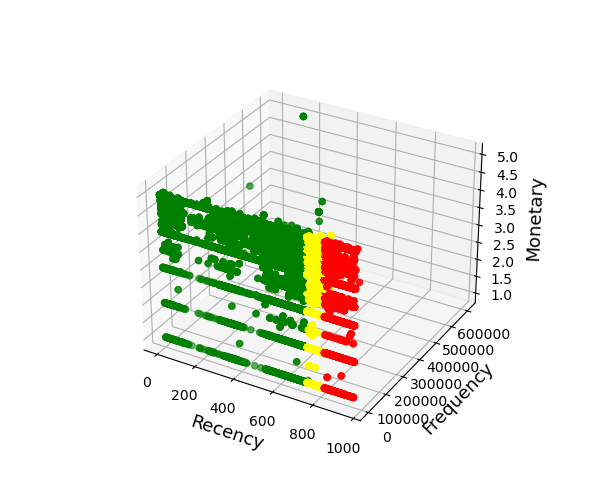

In [98]:
# Interactive 3D scatter plot of each customer's RFM values
%matplotlib widget

# Draw
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111, projection = '3d')

# Decoration
ax.set_xlabel("Recency")
ax.set_ylabel("Frequency")
ax.set_zlabel("Monetary")

# Define color according to Recency (1 and 2:Green, 3:Yellow, 4:Red)
color = ['green' if x[0]<'3' else ('yellow' if x[0]=='3' else 'red') for x in X['RFMScore']]

# Plot
ax.scatter(X['Recency'], X['Frequency'], X['Monetary'], c=color)
plt.show()

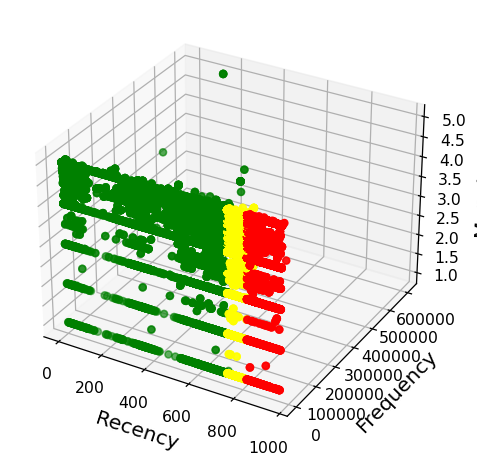

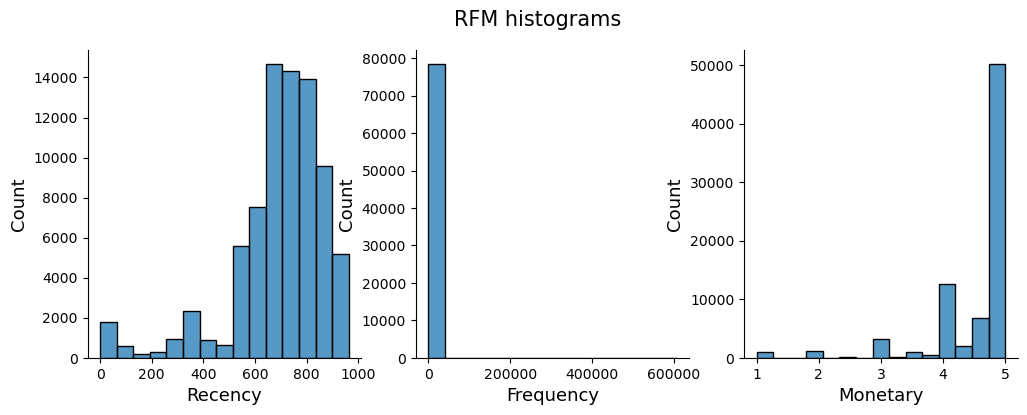

In [99]:
%matplotlib inline
cols = ['Recency', 'Frequency', 'Monetary']

# Draw
fig, ax = plt.subplots(1, 3, figsize=(12, 4), gridspec_kw={'hspace': 0.4})  # Adjust figsize and hspace
for var, subplot in zip(X[cols], ax.flatten()):
    g = sns.histplot(data=X, bins=15, x=var, ax=subplot, kde=False)

# Decoration
sns.despine()
plt.rc('axes', labelsize=13)
fig.suptitle("RFM histograms", fontsize=15);

plt.show()

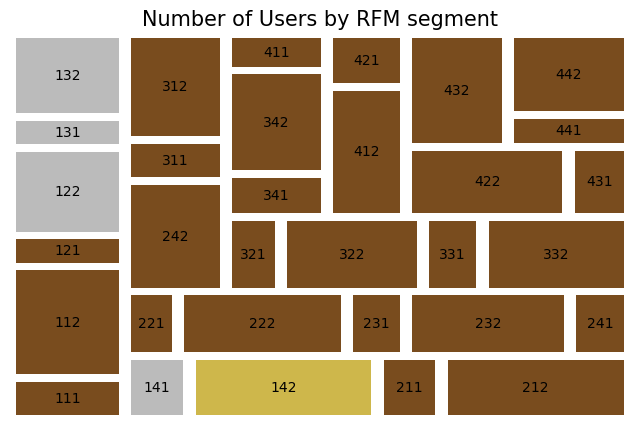

In [86]:
# Treemap with number of customers by segment

# Define colors for levels
def assignColor(rfm):
    if (rfm=='144'):
        hex='#D7D7D7'   # Platinium
    elif (rfm in ['142','143','133','134','124']):
        hex='#C9B037'   # Gold
    elif (rfm in ['141','131','132','122','123','113','114']):
        hex='#B4B4B4'   # Silver
    else:
        hex='#6A3805'   # Bronze
    return hex

color = [assignColor(x) for x in RFMStats.index]

# Draw
fig, ax = plt.subplots(figsize=(8,5))

# Plot
squarify.plot(sizes=RFMStats['NrCustomers'], 
              label=RFMStats.index,
              color = color,
              alpha=.9,
              pad=True)                    

# Decoration
plt.title("Number of Users by RFM segment",fontsize=15)
plt.axis('off')
plt.show()

In [87]:
# Check who are the gold users - "142"
X[X['RFMScore']=='142']

,Recency,Frequency,Monetary,RScore,FScore,MScore,RFMScore
userName,,,,,,,
TDHArizona@TDHArizona,631,217,5.000000,1,4,2,142
Heather M@HeatherM891,586,382,4.666667,1,4,2,142
THE TRAVELLER@Kingpaul100,347,10070,5.000000,1,4,2,142
Nick D@nickd18,481,1310,5.000000,1,4,2,142
Travel and living in France@ralphj718,265,182,4.666667,1,4,2,142
...,...,...,...,...,...,...,...
David K@E7273XWdavidk,588,304,5.000000,1,4,2,142
Ferenc M@LondonFet,599,857,5.000000,1,4,2,142
David L@DavidL816,569,199,5.000000,1,4,2,142


We have a distinguished group of 3013 gold users, and for this exclusive segment, we will implement a unique marketing strategy. These privileged members can enjoy a special promotion applicable to any attraction across Portugal

#### Active users

In [88]:
active_users = ['111','112','121','122','131','132','141','142','211','212','221','222','231','232','241','242']
filtered_rfmscores1 = RFMStats[RFMStats.index.isin(active_users)]
filtered_rfmscores1

,NrCustomers,avgRecency,avgFrequency,avgMonetary
RFMScore,,,,
111,1205,423.473029,6.731950,3.004011
112,3273,470.832570,7.185151,4.991420
121,909,469.216722,31.327833,3.405482
122,2563,493.255560,31.307452,4.980648
131,907,464.761852,91.339581,3.554667
132,2442,489.380426,90.692465,4.960434
141,1038,456.319846,701.998073,3.706877
142,3013,471.263857,1354.493528,4.892782
211,1026,690.086745,7.570175,3.234081


#### Users at risk

In [89]:
risk_users = ['311','312','321','322','331','332','341','342']
filtered_rfmscores2 = RFMStats[RFMStats.index.isin(risk_users)]
filtered_rfmscores2

,NrCustomers,avgRecency,avgFrequency,avgMonetary
RFMScore,,,,
311,1053,772.443495,7.486230,3.204020
312,2746,773.628551,7.933722,4.989136
321,1042,772.703455,31.975048,3.425144
322,2709,774.104836,31.600221,4.971342
331,1140,773.919298,91.453509,3.562792
332,2809,775.321823,91.904948,4.963035
341,1109,775.115419,707.646528,3.686081
342,2668,774.970390,621.782234,4.920394


#### Churned users

In [90]:
risk_users = ['411','412','421','422','431','432','441','442']
filtered_rfmscores3 = RFMStats[RFMStats.index.isin(risk_users)]
filtered_rfmscores3

,NrCustomers,avgRecency,avgFrequency,avgMonetary
RFMScore,,,,
411,944,875.172669,8.007415,3.281780
412,2621,876.545593,8.035483,4.988141
421,1075,874.286512,32.459535,3.483721
422,2919,877.651250,31.534087,4.980239
431,1107,874.583559,91.712737,3.619994
432,2932,875.898022,89.776603,4.967946
441,986,873.745436,546.166329,3.720352
442,2532,873.020932,512.649684,4.944479


In [91]:
sum_of_Active = filtered_rfmscores1['NrCustomers'].sum()
sum_of_at_risk = filtered_rfmscores2['NrCustomers'].sum()
sum_of_Churned = filtered_rfmscores3['NrCustomers'].sum()

print(f"Active users: {sum_of_Active}")
print(f"Users at risk: {sum_of_at_risk}")
print(f"Churned users: {sum_of_Churned}")

Active users: 30600
Users at risk: 15276
Churned users: 15116


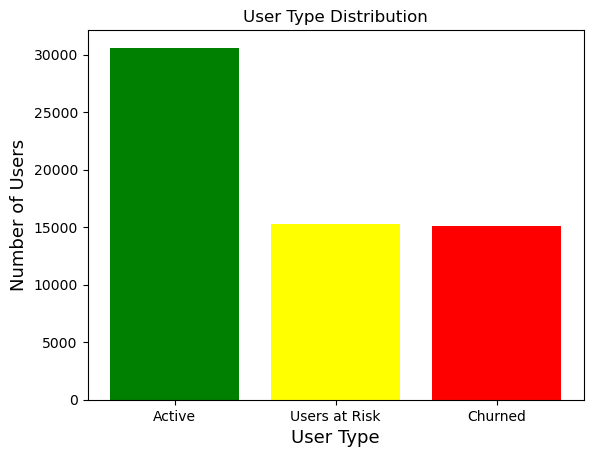

In [104]:
user_types = ['Active', 'Users at Risk', 'Churned']
user_counts = [sum_of_Active, sum_of_at_risk, sum_of_Churned]

plt.bar(user_types, user_counts, color=['green', 'yellow', 'red'])
plt.xlabel('User Type')
plt.ylabel('Number of Users')
plt.title('User Type Distribution')
plt.show()

We plan to tailor distinct marketing strategies for different user segments. Active users will be targeted with either a Cross-sell or an Up-sell campaign. Users identified as being at risk will be the focus of a Retention campaign, while Churned users will be the primary audience for a Reactivation campaign. This segmentation allows us to optimize our marketing efforts based on the specific needs and behaviors of each user group

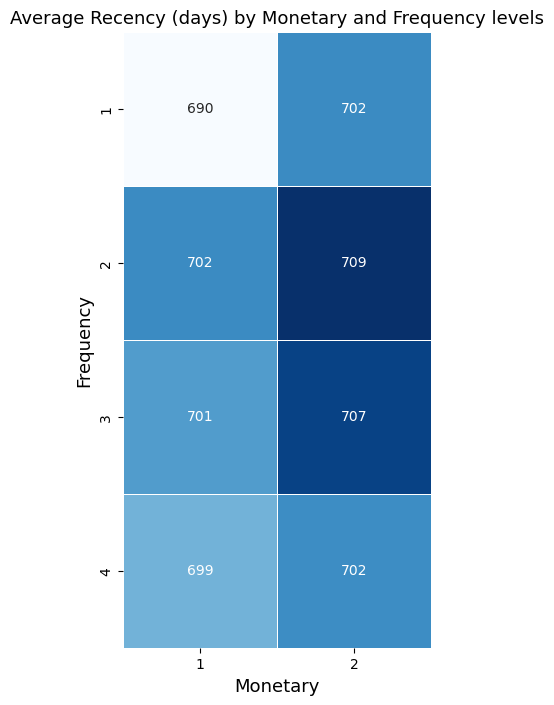

In [92]:
# RFM Heatmap

# Prepare data
tempDF = RFMStats
tempDF['Frequency'] = tempDF.index.str[1]
tempDF['Monetary'] = tempDF.index.str[2]
pt = pd.pivot_table(tempDF, values='avgRecency', 
                     index=['Frequency'], 
                     columns='Monetary')

# Draw
fig , ax = plt.subplots(figsize=(6, 8))
heatmap = sns.heatmap(pt,
                      square = True,
                      linewidths = .5,
                      cmap = 'Blues',
                      cbar=False,
                      fmt='.0f',
                      annot = True,
                      annot_kws = {'size': 10})

# Decoration
plt.title("Average Recency (days) by Monetary and Frequency levels", fontsize=13)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

### By segment averages

In [93]:
# Copy the remaining variables to the modeling dataset (in this case is only the country)
cols = ['userName','userLocation']
X = X.merge(ds[cols], how='left', left_index=True, right_on='userName').drop(columns='userName')

In [94]:
# Encode categorical variables to dummy variables
cols = ['userLocation']
ce_one_hot = ce.OneHotEncoder(cols = cols, use_cat_names=True)
X = ce_one_hot.fit_transform(X)

In [95]:
# Create a copy of the dataset just with the columns to analyze
X_analysis = X.drop(columns=['RScore','FScore','MScore','RFMScore'])

In [96]:
# Check the mean values of each segment
segmentsMeanDF = pd.DataFrame(X_analysis.groupby(X['RFMScore'].values).mean())
segmentsMeanDF.transpose()

,111,112,121,122,131,132,141,142,211,212,...,341,342,411,412,421,422,431,432,441,442
Recency,425.462698,472.790332,470.605941,498.720511,467.928058,491.444376,450.631944,447.550553,690.445672,687.337515,...,775.146783,773.944483,874.888780,876.284618,874.535921,876.949602,874.968291,874.894766,872.077686,870.747049
Frequency,6.869841,7.306922,31.566337,31.535059,91.566547,92.657319,929.964015,2882.915482,7.715470,8.058542,...,858.573727,742.000459,8.119094,8.236833,32.521057,31.689950,91.836040,90.164811,583.448760,605.176223
Monetary,3.031746,4.981693,3.428713,4.958388,3.581835,4.924191,3.746212,4.817220,3.255985,4.972521,...,3.707775,4.856160,3.301181,4.975933,3.500413,4.959623,3.630317,4.938196,3.726446,4.890669
userLocation_Australia,0.031746,0.039188,0.033663,0.038991,0.028777,0.031125,0.037879,0.050711,0.055249,0.053166,...,0.077748,0.077311,0.042323,0.033136,0.038811,0.039198,0.044084,0.046771,0.054545,0.064643
userLocation_United Kingdom,0.489683,0.412185,0.535644,0.438401,0.566547,0.469337,0.500000,0.399842,0.394107,0.337814,...,0.345174,0.271163,0.444882,0.396931,0.467382,0.432066,0.469451,0.403953,0.433058,0.335301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
userLocation_Belize,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000921,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000295,0.000000,0.000000,0.000000,0.000000
userLocation_Herts,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000299,...,0.000000,0.000459,0.000984,0.000000,0.000000,0.000000,0.000773,0.000000,0.000000,0.000000
userLocation_Turkey,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000299,...,0.000000,0.000229,0.000984,0.000000,0.000000,0.000295,0.000773,0.000000,0.000000,0.000000
userLocation_Andorra,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000229,0.000000,0.000000,0.000826,0.000000,0.000000,0.000000,0.000000,0.000281


In [97]:
# Analyze one segment in specific
segmentsMeanDF.loc['142']

Recency                         447.550553
Frequency                      2882.915482
Monetary                          4.817220
userLocation_Australia            0.050711
userLocation_United Kingdom       0.399842
                                  ...     
userLocation_Belize               0.000000
userLocation_Herts                0.000000
userLocation_Turkey               0.000000
userLocation_Andorra              0.000000
userLocation_Hong Kong            0.000000
Name: 142, Length: 121, dtype: float64